In [1]:
# SHAP = SHapley Additive exPlanations 
import shap
import numpy as np 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

/home/williansoder/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
data = load_breast_cancer()
X, y = data['data'], data['target']
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [7]:
# dividindo os dados em treino e teste 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
clf = LinearSVC() # criando o classificado 
clf.fit(X_train, y_train) # treinando o modelo

LinearSVC()

In [9]:
clf.score(X_test, y_test)

0.9385964912280702

In [10]:
clf.predict([X_test[0]])

array([0])

In [11]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10)) # calcula os valores shap 

In [12]:
shap_values = explainer.shap_values(X_test) # gera as explicaçoes (valores shap)

100%|██████████| 114/114 [00:26<00:00,  4.30it/s]


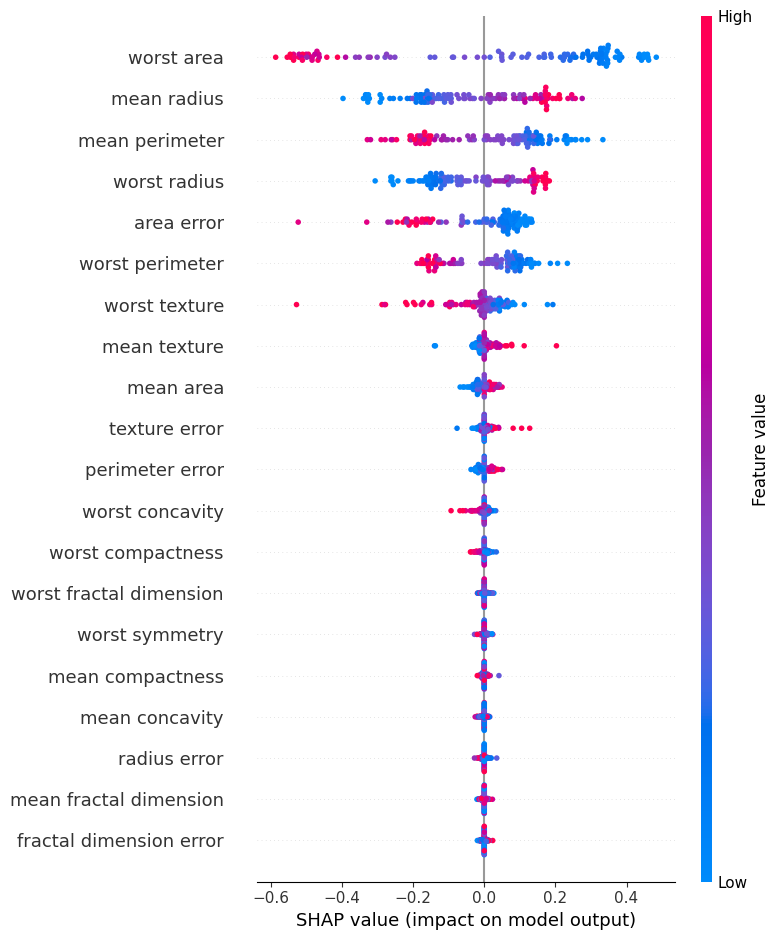

In [13]:
# exibindo os resultados 
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names'])

In [14]:
# visualizando os valores shap de uma instancia 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=data['feature_names'])

In [16]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0) # calculando a media dos valores absolutos 

In [19]:
feature_names = data['feature_names']
feature_importance = zip(feature_names, mean_abs_shap_values)
dict(feature_importance)

{'mean radius': 0.15049100191706727,
 'mean texture': 0.020254502423789233,
 'mean perimeter': 0.1443400149300844,
 'mean area': 0.02013543285060705,
 'mean smoothness': 0.004472386319624763,
 'mean compactness': 0.004879362384146427,
 'mean concavity': 0.004842911705758945,
 'mean concave points': 0.004169615129134611,
 'mean symmetry': 0.004580399352169464,
 'mean fractal dimension': 0.004758097694131405,
 'radius error': 0.004779543663634556,
 'texture error': 0.013095351139376344,
 'perimeter error': 0.013046225023303463,
 'area error': 0.10298285012720004,
 'smoothness error': 0.004413767087099076,
 'compactness error': 0.0043116289791654645,
 'concavity error': 0.004425905363394198,
 'concave points error': 0.004462555166876904,
 'symmetry error': 0.004215248143523098,
 'fractal dimension error': 0.004708647484632178,
 'worst radius': 0.12020199184362618,
 'worst texture': 0.05919844630280696,
 'worst perimeter': 0.09916404843896694,
 'worst area': 0.322800522494843,
 'worst smoo